In [1]:
# Random imputation 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
#numerical imputation .
df = pd.read_csv("titanic_toy",usecols=['Age','Fare','Survived'])

In [3]:
# We filling only age[Nan] with random imputation . 

In [4]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Survived     0.000000
dtype: float64

In [5]:
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [6]:
x = df.drop(['Survived'],axis=1)
y = df['Survived']

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed']  = x_test['Age']

In [9]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [10]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

In [11]:
x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [12]:
x_test

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0
...,...,...,...
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,24.0
870,26.0,7.8958,26.0


C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\NIKUNJ KIKANI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_imputed', ylabel='Density'>

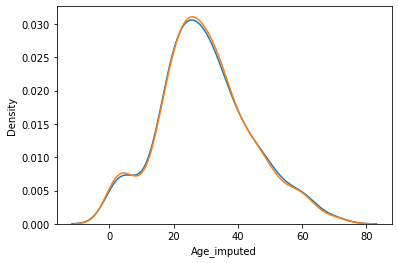

In [13]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label='Original',hist=False)

In [14]:
print("original variable variance :",x_train['Age'].var())
print("variance after random imputation :",x_train['Age_imputed'].var())

original variable variance : 204.34951339046142
variance after random imputation : 201.26030798665434


In [15]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2448.197914,70.719262,55.279619
Age,70.719262,204.349513,204.349513
Age_imputed,55.279619,204.349513,201.260308


<AxesSubplot:>

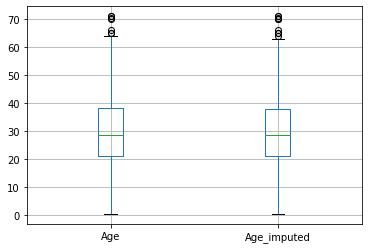

In [16]:
x_train[['Age','Age_imputed']].boxplot()

In [17]:
# categorical imputation.

In [18]:
df1 = pd.read_csv("house_train.csv",usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [19]:
df1.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [20]:
df1.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [21]:
x = df1.drop(['SalePrice'],axis=1)
y = df1['SalePrice']

In [22]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
x_train['GarageQual_imputed'] = x_train['GarageQual']
x_test['GarageQual_imputed'] = x_test['GarageQual']

x_train['FireplaceQu_imputed'] = x_train['FireplaceQu']
x_test['FireplaceQu_imputed'] = x_test['FireplaceQu']

In [24]:
x_train

,FireplaceQu,GarageQual,GarageQual_imputed,FireplaceQu_imputed
455,TA,TA,TA,TA
863,NaN,TA,TA,NaN
504,Fa,TA,TA,Fa
1413,Gd,TA,TA,Gd
1389,Gd,TA,TA,Gd
...,...,...,...,...
466,Po,TA,TA,Po
299,Gd,TA,TA,Gd
493,Fa,TA,TA,Fa
527,Gd,TA,TA,Gd


In [25]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()] = x_train['GarageQual'].dropna().sample(x_test['GarageQual'].isnull().sum()).values

In [26]:
x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_train['FireplaceQu'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()] = x_train['FireplaceQu'].dropna().sample(x_test['FireplaceQu'].isnull().sum()).values

In [27]:
temp = pd.concat(
    [
        x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
        x_train['GarageQual_imputed'].value_counts() / len(x_train)   
    ],
axis=1)

temp.columns = ['original','imputed']

In [28]:
temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [29]:
temp = pd.concat(
        [
            x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
            x_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.649832
TA,0.412439,0.539843
Fa,0.040917,0.054994
Po,0.027823,0.035915
Ex,0.024550,0.030303


In [ ]:
#the end.